## Sarsa (on-policy TD control) for Windy Gridworld Environment

There are three levels of difficulties:
- original:
  - four actions: up, down, right, and left
- with King's moves: 
  - including diagonal moves
- with stochastic wind:
  - the wind can be stochastic, varying by 1 from the value given by each column

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from matplotlib import animation
from grid_world import WindyGridworld, WindyGridworld_KingsMove

In [2]:
def epsilon_greedy_policy(q_values, obs, act_num, eps=0.1):
    if np.random.random() < eps:
        act = np.random.randint(0, act_num)
    else:
        act = np.argmax(q_values[tuple(obs)])
    return act


def run(env, episode_num=1000, eps=0.1, step_size=0.5):
    q_values = np.zeros(env.world.shape + (env.action_space.n, ))
    gamma = 1  # Undiscounted

    for _ in tqdm(range(episode_num)):
        obs = env.reset()
        act = epsilon_greedy_policy(q_values,
                                    obs,
                                    act_num=env.action_space.n,
                                    eps=eps)
        while True:
            next_obs, reward, done, _ = env.step(act)
            next_act = epsilon_greedy_policy(q_values,
                                             next_obs,
                                             act_num=env.action_space.n,
                                             eps=eps)
            cur_sa_value = q_values[tuple(obs)][act]
            next_sa_value = q_values[tuple(next_obs)][next_act]
            q_values[tuple(obs)][act] = cur_sa_value + step_size * (
                reward + gamma * next_sa_value - cur_sa_value)
            if done:
                break
            else:
                obs = next_obs
                act = next_act
    return q_values


def run_one_episode(env, q_values):
    obs = env.reset()
    traj = [obs]
    for i in range(20):
        act = np.argmax(q_values[tuple(obs)])
        next_obs, reward, done, _ = env.step(act)
        traj.append(next_obs)
        if done:
            break
        else:
            obs = next_obs
    return traj

100%|██████████| 200/200 [00:00<00:00, 453.52it/s]


<IPython.core.display.Javascript object>


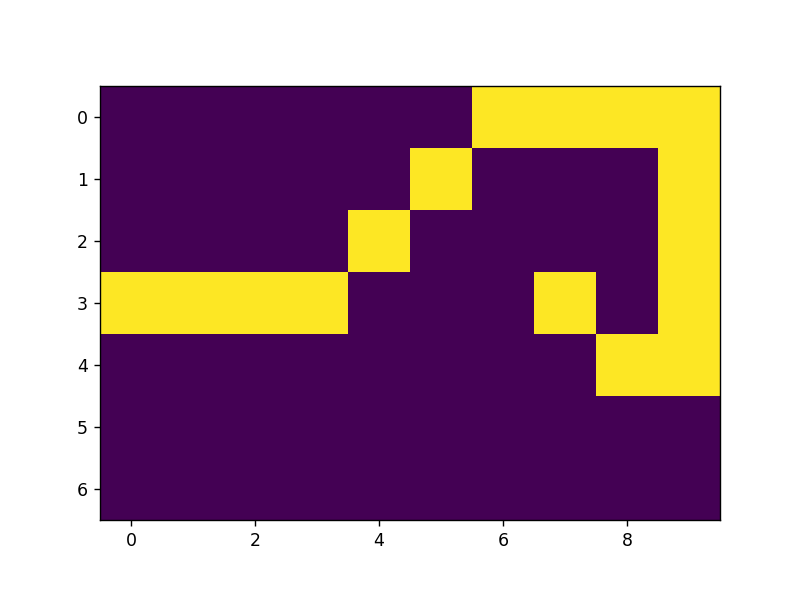

In [3]:
%matplotlib notebook
env = WindyGridworld()
q_values = run(env, episode_num=200)
traj = run_one_episode(env, q_values)
world = np.zeros(env.world.shape)
world[(3, 0)] = 1
world[(3, 7)] = 2

def _animate(i):
    x, y = traj[i]
    world[x, y] = 3
    img.set_data(world)
    return img

def _init():
    img.set_data(world)
    return img

fig, ax = plt.subplots()
img = ax.imshow(world)
ani = animation.FuncAnimation(fig=fig,
                              func=_animate,
                              frames=len(traj),
                              init_func=_init,
                              interval=80,
                              blit=False)

plt.show()

100%|██████████| 2000/2000 [00:03<00:00, 648.81it/s] 


<IPython.core.display.Javascript object>


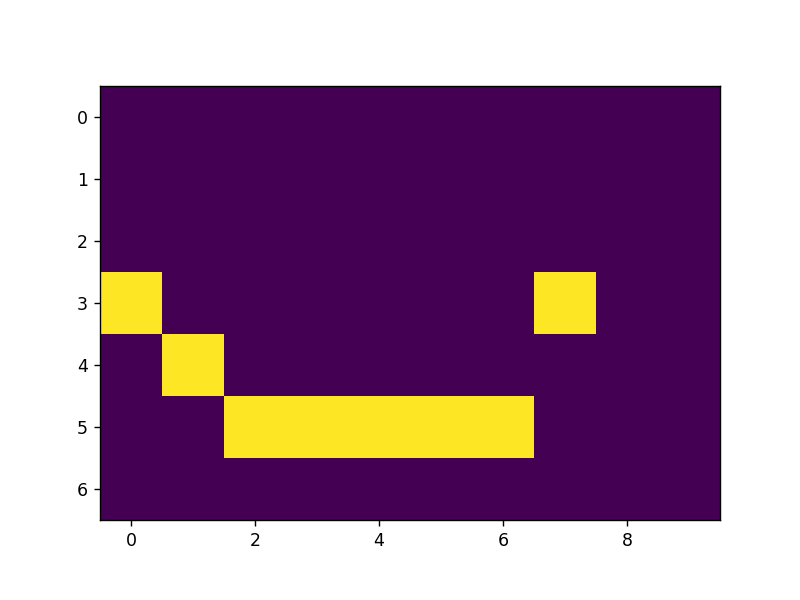

In [4]:
%matplotlib notebook
env = WindyGridworld_KingsMove()
q_values = run(env, episode_num=2000, eps=0.1, step_size=0.05)
traj = run_one_episode(env, q_values)
world = np.zeros(env.world.shape)
world[(3, 0)] = 1
world[(3, 7)] = 2

def _animate(i):
    x, y = traj[i]
    world[x, y] = 3
    img.set_data(world)
    return img

def _init():
    img.set_data(world)
    return img

fig, ax = plt.subplots()
img = ax.imshow(world)
ani = animation.FuncAnimation(fig=fig,
                              func=_animate,
                              frames=len(traj),
                              init_func=_init,
                              interval=80,
                              blit=False)

plt.show()

In [5]:
env = WindyGridworld_KingsMove(stochastic_wind=True)
q_values = run(env, episode_num=10000, eps=0.1, step_size=0.05)

# Test phase, evaluate average episode length in a stochastic environment
cnt = []
for _ in range(100):
    traj = run_one_episode(env, q_values)
    cnt.append(len(traj))
print(np.mean(cnt))

100%|██████████| 10000/10000 [00:14<00:00, 712.56it/s]

12.39
